In [115]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

Read network

In [116]:
#n=pypsa.Network("../../results/nz_2050/postnetworks/elec_s_10_ec_lc3.0_Co2L_3H_2050_0.071_AB_0export.nc")
#n=pypsa.Network("../../results/nz_2050_cap/postnetworks/elec_s_10_ec_lc3.0_Co2L0.0_3H_2050_0.071_AB_0export.nc")
#n=pypsa.Network("../../results/nz_nosmr/postnetworks/elec_s_10_ec_lc3.0_Co2L_3H_2030_0.071_AB_0export.nc")
n=pypsa.Network("../../results/nz_2035_exp/postnetworks/elec_s_10_ec_lc3.0_Co2L_3H_2035_0.071_AB_14export.nc")
#n=pypsa.Network("../../results/nz_2050_nmain/postnetworks/elec_s_10_ec_lc3.0_Co2L0.0_3H_2050_0.071_AB_0export.nc")
#n=pypsa.Network("../../results/dummy/elec_s_10_ec_lc1.0_Co2L_3H_2030_0.071_AB_120export.nc")

#n=pypsa.Network("../../results/dummy/elec_s_10_ec_lcopt_Co2L-3H.nc")

Index(['H2 pipeline NZ.15_1 -> NZ.17_1', 'H2 pipeline NZ.17_1 -> NZ.1_1',
       'H2 pipeline NZ.1_1 -> NZ.11_1'],
      dtype='object', name='name')
Index(['H2 pipeline NZ.15_1 -> NZ.17_1', 'H2 pipeline NZ.17_1 -> NZ.1_1',
       'H2 pipeline NZ.1_1 -> NZ.11_1'],
      dtype='object', name='name')
INFO:pypsa.io:Imported network elec_s_10_ec_lc3.0_Co2L_3H_2035_0.071_AB_14export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [117]:
n.generators[n.generators.carrier=="onwind"].p_nom_max.sum() /1e3

671.1767878414863

In [118]:
n.generators[n.generators.carrier=="solar"].p_nom_max.sum() /1e3

744.6785747158897

In [119]:
stats = n.statistics()

In [120]:
(n.statistics.optimal_capacity()["Generator"]/1e3).round(1) # Capacity in GW

carrier
Coal                                          0.5
Combined-Cycle Gas                            1.8
Geothermal                                    1.1
Offshore Wind (AC)                            0.0
Offshore Wind (DC)                            0.0
Oil                                           0.2
Onshore Wind                                  8.8
Open-Cycle Gas                                0.5
Run of River                                  0.4
Solar                                        16.1
gas                                           4.3
residential rural solar thermal               0.0
residential urban decentral solar thermal     0.0
services rural solar thermal                  0.0
services urban decentral solar thermal        0.0
urban central solar thermal                   0.0
dtype: float64

### Dispatch

In [121]:
(n.statistics.dispatch()[n.statistics.dispatch()>1e3]/ 1e6).round(1)  # Energy in TWh

component    carrier                               
StorageUnit  Reservoir & Dam                           32.5
Store        Oil                                       98.1
             solid biomass                             10.8
Generator    Coal                                       3.9
             Combined-Cycle Gas                         2.5
             Geothermal                                 9.8
             Oil                                        0.0
             Onshore Wind                              27.5
             Open-Cycle Gas                             0.1
             Run of River                               2.8
             Solar                                     20.5
             gas                                       33.4
Load         gas emissions                              0.8
             industry coal emissions                    4.5
             industry oil emissions                     2.1
             land transport oil emissions       

### Hydro analysis

In [122]:
n.storage_units

,cyclic_state_of_charge,max_hours,p_nom,p_min_pu,bus,efficiency_dispatch,efficiency_store,carrier,marginal_cost,p_nom_opt,...,marginal_cost_quadratic,capital_cost,build_year,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NZ.12_1_AC hydro,True,6.0,752.000000,0.0,NZ.12_1_AC,0.9,0.0,hydro,0.009920,752.000000,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.14_1_AC hydro,True,6.0,800.000000,0.0,NZ.14_1_AC,0.9,0.0,hydro,0.010793,800.000000,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.17_1_AC hydro,True,6.0,1338.280255,0.0,NZ.17_1_AC,0.9,0.0,hydro,0.009380,1338.280255,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.2_1_AC hydro,True,6.0,78.980892,0.0,NZ.2_1_AC,0.9,0.0,hydro,0.009412,78.980892,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.3_1_AC hydro,True,6.0,1782.108280,0.0,NZ.3_1_AC,0.9,0.0,hydro,0.010034,1782.108280,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.9_1_AC hydro,True,6.0,31.592357,0.0,NZ.9_1_AC,0.9,0.0,hydro,0.009139,31.592357,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0


In [123]:
n.storage_units[n.storage_units.carrier=="hydro"].p_nom.sum()

4782.961783439491

In [124]:
n.statistics.capacity_factor(comps=["Generator","StorageUnit"]).round(2)

component    carrier                                  
Generator    Coal                                         0.88
             Combined-Cycle Gas                           0.16
             Geothermal                                   1.00
             Offshore Wind (AC)                           0.33
             Offshore Wind (DC)                           0.36
             Oil                                          0.00
             Onshore Wind                                 0.36
             Open-Cycle Gas                               0.02
             Run of River                                 0.80
             Solar                                        0.14
             gas                                          0.90
             residential rural solar thermal              0.01
             residential urban decentral solar thermal    0.01
             services rural solar thermal                 0.01
             services urban decentral solar thermal       0.01


<AxesSubplot:xlabel='snapshot'>

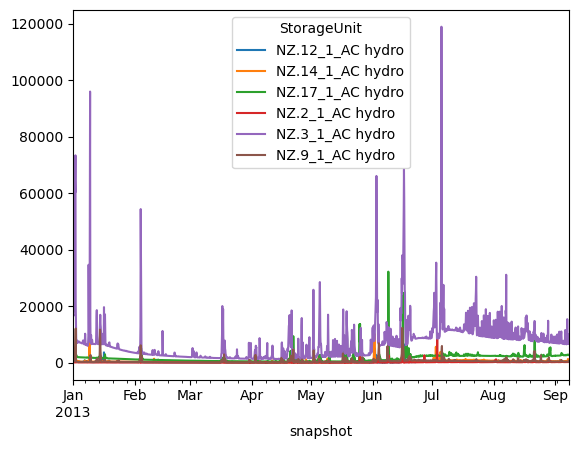

In [125]:
n.storage_units_t.inflow.iloc[0:2000].plot() #sum()

In [126]:
# Total inflow in TWh
n.storage_units_t.inflow.sum().sum() /1e6

38.43562705151135

In [127]:
n.statistics.capex()[n.statistics.capex()>1e6] / 1e6

component  carrier                       
Store      H2                                 11.325784
Generator  Coal                              176.665701
           Combined-Cycle Gas                183.289187
           Geothermal                        377.934370
           Oil                                 5.722997
           Onshore Wind                      855.251305
           Open-Cycle Gas                     24.716348
           Run of River                      120.419823
           Solar                             577.692060
Link       H2 Electrolysis                   210.446560
           H2 pipeline                         5.573131
           urban central gas boiler            1.939274
           urban central resistive heater      1.840694
Line       AC                                227.833424
dtype: float64

Hydro analysis PyPSA-Earth

In [128]:
n_earth = pypsa.Network("../../results/pypsa-earth/nz_hydro_eia/networks/elec_s.nc")

INFO:pypsa.io:Imported network elec_s.nc has buses, carriers, generators, lines, loads, storage_units


In [129]:
n_earth.storage_units.iloc[0][0:20]

p_min_pu                         0.0
efficiency_store                 0.0
p_nom                      31.592357
cyclic_state_of_charge          True
max_hours                        6.0
efficiency_dispatch              0.9
bus                              102
carrier                        hydro
control                           PQ
type                                
p_nom_mod                        0.0
p_nom_extendable               False
p_nom_min                        0.0
p_nom_max                        inf
p_max_pu                         1.0
p_set                            0.0
q_set                            0.0
sign                             1.0
marginal_cost                    0.0
marginal_cost_quadratic          0.0
Name: 102 hydro, dtype: object

In [130]:
n_earth.storage_units_t.inflow

StorageUnit
snapshot
2013-01-01 00:00:00
2013-01-01 01:00:00
2013-01-01 02:00:00
2013-01-01 03:00:00
2013-01-01 04:00:00
...
2013-12-31 19:00:00
2013-12-31 20:00:00
2013-12-31 21:00:00


### Onshore wind profiles

In [131]:
n.generators_t.p_max_pu[n.generators[n.generators.carrier=="onwind"].index]

Generator,NZ.11_1_AC onwind,NZ.12_1_AC onwind,NZ.14_1_AC onwind,NZ.15_1_AC onwind,NZ.16_1_AC onwind,NZ.17_1_AC onwind,NZ.18_1_AC onwind,NZ.1_1_AC onwind,NZ.2_1_AC onwind,NZ.3_1_AC onwind,NZ.6_1_AC onwind,NZ.7_1_AC onwind,NZ.8_1_AC onwind,NZ.9_1_AC onwind
snapshot,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.000000,0.605257,0.685778,0.611778,0.570400,0.179393,1.000000,0.026962,0.208319,0.708692,0.221467,0.777758,0.900255,0.737307
2013-01-01 03:00:00,0.014650,0.310094,0.500535,0.573287,0.699144,0.151121,0.999995,0.053850,0.165426,0.681552,0.185190,0.708127,0.888320,0.841614
2013-01-01 06:00:00,0.026180,0.300824,0.406579,0.483147,0.555122,0.110109,0.999600,0.031924,0.154259,0.688914,0.179544,0.594974,0.894841,0.811541
2013-01-01 09:00:00,0.019969,0.212508,0.200322,0.395566,0.548924,0.054803,0.999486,0.016736,0.143926,0.682929,0.277288,0.529393,0.839574,0.756221
2013-01-01 12:00:00,0.039251,0.052105,0.101886,0.436919,0.522939,0.030010,0.999792,0.016743,0.061296,0.645713,0.297200,0.560507,0.833642,0.722990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 09:00:00,0.011058,0.036443,0.160783,0.089985,0.053242,0.043387,0.566389,0.000000,0.084780,0.223958,0.068493,0.161166,0.510700,0.146631
2013-12-31 12:00:00,0.000000,0.024212,0.072696,0.158816,0.104177,0.000000,0.487352,0.000000,0.043123,0.212908,0.035748,0.135610,0.435731,0.081341
2013-12-31 15:00:00,0.015433,0.000000,0.034876,0.233657,0.146860,0.000000,0.439300,0.000000,0.000000,0.136530,0.014416,0.130597,0.493914,0.150137


### Statistics

In [132]:
stats

Optimal Capacity  \
Generator Coal                                         5.000000e+02   
          Combined-Cycle Gas                           1.838951e+03   
          Geothermal                                   1.120000e+03   
          Offshore Wind (AC)                           1.326055e-03   
          Offshore Wind (DC)                           1.330981e-03   
...                                                             ...   
Store     residential urban decentral water tanks      7.415429e-02   
          services rural water tanks                   7.030657e-02   
          services urban decentral water tanks         7.074767e-02   
          solid biomass                                4.000000e+07   
          urban central water tanks                    1.674556e+01   

                                                   Installed Capacity  \
Generator Coal                                           5.000000e+02   
          Combined-Cycle Gas                             1.838951e+03   
          Geothermal                                     1.120000e+03   
          Offshore Wind (AC)                             0.000000e+00   
          Offshore Wind (DC)                             0.000000e+00   
...                                                               ...   
Store     residential urban decentral water tanks        0.000000e+00   
          services rural water tanks                     0.000000e+00   
          services urban decentral water tanks           0.000000e+00   
          solid biomass                                  4.000000e+07   
          urban central water tanks                      0.000000e+00   

                                                   Capacity Factor  \
Generator Coal                                            0.883180   
          Combined-Cycle Gas                              0.158083   
          Geothermal                                      0.999916   
          Offshore Wind (AC)                              0.329237   
          Offshore Wind (DC)                              0.362311   
...                                                            ...   
Store     residential urban decentral water tanks         0.468997   
          services rural water tanks                      0.471066   
          services urban decentral water tanks            0.469879   
          solid biomass                                   0.865630   
          urban central water tanks                       0.451610   

                                                       Dispatch  Transmission  \
Generator Coal                                     3.868327e+06           0.0   
          Combined-Cycle Gas                       2.546595e+06           0.0   
          Geothermal                               9.810376e+06           0.0   
          Offshore Wind (AC)                       3.824497e+00           0.0   
          Offshore Wind (DC)                       4.224329e+00           0.0   
...                                                         ...           ...   
Store     residential urban decentral water tanks -4.144447e+00           0.0   
          services rural water tanks              -3.946731e+00           0.0   
          services urban decentral water tanks    -3.961485e+00           0.0   
          solid biomass                            1.083784e+07           0.0   
          urban central water tanks               -1.532517e+01           0.0   

                                                    Withdrawal        Supply  \
Generator Coal                                        0.000000  3.868327e+06   
          Combined-Cycle Gas                          0.000000  2.546595e+06   
          Geothermal                                  0.000000  9.810376e+06   
          Offshore Wind (AC)                          0.000000  3.824497e+00   
          Offshore Wind (DC)                          0.000000  4.224329e+00   
...                        

### Solar PV and onshore wind potentials

Capacity

In [133]:
n.generators.groupby("carrier").sum().p_nom_max / 1e3 # from MW to GW

carrier
CCGT                                                NaN
OCGT                                                NaN
coal                                                inf
gas                                                 NaN
geothermal                                          NaN
offwind-ac                                     2.862280
offwind-dc                                    19.545018
oil                                                 inf
onwind                                       671.176788
residential rural solar thermal                     NaN
residential urban decentral solar thermal           NaN
ror                                                 NaN
services rural solar thermal                        NaN
services urban decentral solar thermal              NaN
solar                                        744.678575
urban central solar thermal                         NaN
Name: p_nom_max, dtype: float64

### Hydrogen supply and demand

In [134]:
carrier = "H2"
ebalance = n.statistics.energy_balance().loc[:, :, carrier].groupby(
    "carrier"
).sum().to_frame()

In [135]:
threshold = 1e3
ebalance = ebalance[ebalance.values<-threshold]
ebalance = ebalance / 1e6 # from MWh to TWh

In [136]:
ebalance.sum()

0   -16.43266
dtype: float64

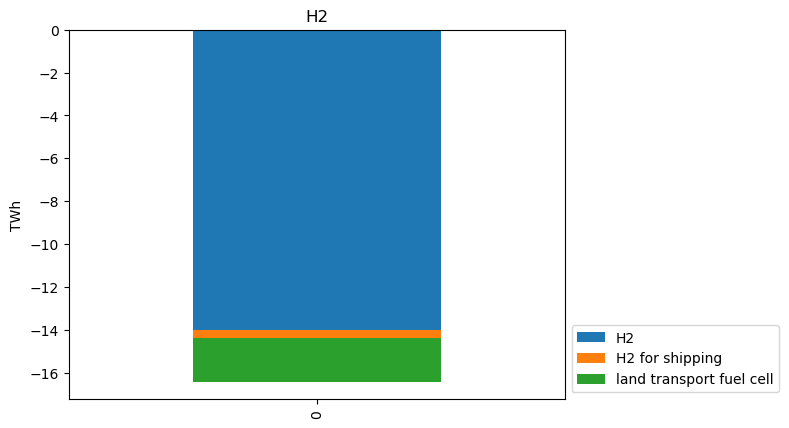

In [137]:
fig, ax = plt.subplots()
ebalance.T.plot.bar(stacked=True, ax=ax, title=carrier, ylabel="TWh")
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)

### Transport

In [138]:
ebalance = n.statistics.energy_balance().loc[:, :, "AC"].groupby(
    "carrier"
).sum().to_frame()

In [139]:
ebalance # BEV charger

,0
carrier,
rail transport electricity,-1.331893e+05
AC,-2.924429e+07
BEV charger,-4.740189e+06
Coal,3.868327e+06
Combined-Cycle Gas,2.546595e+06
DAC,-1.064979e+01
Geothermal,9.810376e+06
H2 Electrolysis,-2.347553e+07
H2 Fuel Cell,1.672589e+01


In [140]:
ebalance = ebalance[ebalance.values<-1e3]

### Constraints

In [141]:
n.global_constraints

,type,carrier_attribute,sense,constant,investment_period,mu
GlobalConstraint,,,,,,
CO2Limit,primary_energy,co2_emissions,<=,7.200000e+07,NaN,0.0
lc_limit,transmission_expansion_cost_limit,"AC, DC",<=,8.487026e+08,NaN,0.0


### Capacity factors

In [142]:
n.statistics.capacity_factor(comps=["Generator"])*100

component  carrier                                  
Generator  Coal                                         88.317958
           Combined-Cycle Gas                           15.808320
           Geothermal                                   99.991606
           Offshore Wind (AC)                           32.923696
           Offshore Wind (DC)                           36.231106
           Oil                                           0.171325
           Onshore Wind                                 35.555999
           Open-Cycle Gas                                1.728466
           Run of River                                 79.740162
           Solar                                        14.495675
           gas                                          89.623521
           residential rural solar thermal               0.912714
           residential urban decentral solar thermal     0.914718
           services rural solar thermal                  0.911593
           services urb

In [143]:
n.generators_t.p_max_pu[n.generators[n.generators.carrier=="solar"].index].mean()

Generator
NZ.11_1_AC solar    0.142317
NZ.12_1_AC solar    0.129211
NZ.14_1_AC solar    0.121415
NZ.15_1_AC solar    0.146599
NZ.16_1_AC solar    0.136221
NZ.17_1_AC solar    0.137932
NZ.18_1_AC solar    0.144976
NZ.1_1_AC solar     0.143815
NZ.2_1_AC solar     0.142423
NZ.3_1_AC solar     0.137592
NZ.6_1_AC solar     0.142970
NZ.7_1_AC solar     0.138105
NZ.8_1_AC solar     0.145610
NZ.9_1_AC solar     0.145993
dtype: float64

### Storage capacities

In [144]:
# n.stores.groupby["carrier"].sum() #.e_nom_opt

In [145]:
n.stores[n.stores.carrier=="H2"].e_nom_opt.sum() / 1e6 # from MWh to TWh

333.66615163784303

In [146]:
n.stores[n.stores.carrier=="battery"].e_nom_opt.sum() / 1e6 # from MWh to TWh

5.597803239594656e-07

In [147]:
n.stores[n.stores.carrier=="Li ion"].e_nom_opt.sum() / 1e6 # from MWh to TWh

0.018281499999999992

In [148]:
# 10 TWh h2 and 11 TWh battery

In [149]:
n.stores.carrier.unique()

array(['co2', 'co2 stored', 'oil', 'gas', 'H2', 'battery',
       'residential rural water tanks', 'services rural water tanks',
       'residential urban decentral water tanks',
       'services urban decentral water tanks',
       'urban central water tanks', 'biogas', 'solid biomass', 'Li ion'],
      dtype=object)

In [150]:
n.storage_units

,cyclic_state_of_charge,max_hours,p_nom,p_min_pu,bus,efficiency_dispatch,efficiency_store,carrier,marginal_cost,p_nom_opt,...,marginal_cost_quadratic,capital_cost,build_year,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NZ.12_1_AC hydro,True,6.0,752.000000,0.0,NZ.12_1_AC,0.9,0.0,hydro,0.009920,752.000000,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.14_1_AC hydro,True,6.0,800.000000,0.0,NZ.14_1_AC,0.9,0.0,hydro,0.010793,800.000000,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.17_1_AC hydro,True,6.0,1338.280255,0.0,NZ.17_1_AC,0.9,0.0,hydro,0.009380,1338.280255,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.2_1_AC hydro,True,6.0,78.980892,0.0,NZ.2_1_AC,0.9,0.0,hydro,0.009412,78.980892,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.3_1_AC hydro,True,6.0,1782.108280,0.0,NZ.3_1_AC,0.9,0.0,hydro,0.010034,1782.108280,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
NZ.9_1_AC hydro,True,6.0,31.592357,0.0,NZ.9_1_AC,0.9,0.0,hydro,0.009139,31.592357,...,0.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0


In [151]:
n.storage_units.p_nom.sum()

4782.961783439491

### Renewable electricity share

In [152]:
n.statistics.dispatch(comps=["Generator"]).sum() / 1e6

100.44571698169365

In [153]:
n.statistics.dispatch(comps=["Generator"])

component  carrier                                  
Generator  Coal                                         3.868327e+06
           Combined-Cycle Gas                           2.546595e+06
           Geothermal                                   9.810376e+06
           Offshore Wind (AC)                           3.824497e+00
           Offshore Wind (DC)                           4.224329e+00
           Oil                                          2.252209e+03
           Onshore Wind                                 2.748346e+07
           Open-Cycle Gas                               8.237255e+04
           Run of River                                 2.781699e+06
           Solar                                        2.045476e+07
           gas                                          3.341586e+07
           residential rural solar thermal              1.744925e+00
           residential urban decentral solar thermal    1.744328e+00
           services rural solar thermal           

In [154]:
# Get electricity buses
el_buses = n.buses[n.buses.carrier == "AC"].index

In [155]:
n.generators[n.generators.bus.isin(el_buses)].index #.p_nom_opt.sum() / 1e3

Index(['NZ.11_1_AC geothermal', 'NZ.11_1_AC onwind', 'NZ.11_1_AC solar',
       'NZ.12_1_AC onwind', 'NZ.12_1_AC ror', 'NZ.12_1_AC solar',
       'NZ.14_1_AC onwind', 'NZ.14_1_AC solar', 'NZ.15_1_AC CCGT',
       'NZ.15_1_AC onwind', 'NZ.15_1_AC ror', 'NZ.15_1_AC solar',
       'NZ.16_1_AC onwind', 'NZ.16_1_AC solar', 'NZ.17_1_AC CCGT',
       'NZ.17_1_AC OCGT', 'NZ.17_1_AC coal', 'NZ.17_1_AC geothermal',
       'NZ.17_1_AC onwind', 'NZ.17_1_AC ror', 'NZ.17_1_AC solar',
       'NZ.18_1_AC offwind-ac', 'NZ.18_1_AC offwind-dc', 'NZ.18_1_AC onwind',
       'NZ.18_1_AC solar', 'NZ.1_1_AC CCGT', 'NZ.1_1_AC OCGT',
       'NZ.1_1_AC onwind', 'NZ.1_1_AC solar', 'NZ.2_1_AC geothermal',
       'NZ.2_1_AC onwind', 'NZ.2_1_AC ror', 'NZ.2_1_AC solar',
       'NZ.3_1_AC onwind', 'NZ.3_1_AC ror', 'NZ.3_1_AC solar', 'NZ.6_1_AC oil',
       'NZ.6_1_AC onwind', 'NZ.6_1_AC ror', 'NZ.6_1_AC solar',
       'NZ.7_1_AC onwind', 'NZ.7_1_AC solar', 'NZ.8_1_AC onwind',
       'NZ.8_1_AC solar', 'NZ.9_1_AC onwin